**Step 01: Install All the Required Packages**

In [1]:
!pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.4 MB/s eta 0:00:00


**Step 02: Import All the Required Libraries**

In [2]:
import google.generativeai as genai

In [3]:
# Used to securely store your API key
from google.colab import userdata
#dotenv package to load the API key
from dotenv import load_dotenv
from IPython.display import display
from IPython.display import Markdown
import textwrap

**Step 03: Setup your API Key**

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.


<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In [4]:
GOOGLE_API_KEY=userdata.get('GEMINI_API_KEYS')

genai.configure(api_key=GOOGLE_API_KEY)


In [5]:
#Create a new .env file in the workspace and store the API key in it
!echo -e 'GOOGLE_API_KEY=paste_keys_here' > .env

In [6]:
!ls -a

.  ..  .config	.env  sample_data


In [7]:
load_dotenv()

True

In [8]:
#Create a helper function that will convert the markdown into nicely formatted text
def to_markdown(text):
  text = text.replace('•','*')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

**Step 04: List of Available Gemini Models**

Now we are ready to use Gemini API. Use list_models to see the available Gemini Models:

gemini_pro: optimized for text-only prompts.

gemini-pro-vision: optimized for text-and-images prompts.

In [14]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [15]:
model = genai.GenerativeModel('gemini-pro')

In [16]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 114 ms, sys: 11.1 ms, total: 125 ms
Wall time: 15.6 s


In [13]:
response

In [17]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [16]:
response.text

"The meaning of life is a philosophical question that has been pondered by humans for centuries. There is no one definitive answer that everyone agrees on, as the meaning of life is a personal and individual experience. However, there are some common themes that arise when people discuss the meaning of life, such as:\n\n* **Finding purpose and fulfillment:** Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their lives. This can be achieved through work, relationships, hobbies, or other activities that bring joy and satisfaction.\n* **Making a difference in the world:** Some people believe that the meaning of life is to make a positive difference in the world. This can be done through volunteering, activism, or simply being kind to others.\n* **Experiencing love and connection:** Many people believe that the meaning of life is to experience love and connection with others. This can be achieved through romantic relationships, friendships, or f

In [17]:
to_markdown(response.text)

>The meaning of life is a philosophical question that has been pondered by humans for centuries. There is no one definitive answer that everyone agrees on, as the meaning of life is a personal and individual experience. However, there are some common themes that arise when people discuss the meaning of life, such as:
>
>* **Finding purpose and fulfillment:** Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their lives. This can be achieved through work, relationships, hobbies, or other activities that bring joy and satisfaction.
>* **Making a difference in the world:** Some people believe that the meaning of life is to make a positive difference in the world. This can be done through volunteering, activism, or simply being kind to others.
>* **Experiencing love and connection:** Many people believe that the meaning of life is to experience love and connection with others. This can be achieved through romantic relationships, friendships, or family bonds.
>* **Understanding oneself:** Some people believe that the meaning of life is to understand oneself and one's place in the universe. This can be done through introspection, meditation, or studying philosophy and religion.
>
>Ultimately, the meaning of life is a personal and individual experience, and there is no one right answer. The best way to find meaning in your life is to explore your own values and beliefs, and to find activities and relationships that bring you joy and fulfillment.

**Step 05: Use LangChain to Access Gemini Pro Model**

**Generate Text from the Text Inputs**

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [15]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [20]:
result = llm.invoke("What is Mean Average Precision")

In [21]:
to_markdown(result.content)

>Mean Average Precision (MAP) is a widely used evaluation metric for object detection models that measures the average quality of object detection algorithms for a set of images. It is particularly suitable for problems where there are multiple objects of different classes within an image, and the goal is to rank the detected objects based on their relevance or confidence score.
>
>MAP is calculated by considering the average of the average precision (AP) scores for each class in the dataset. AP, in turn, is computed as follows:
>
>1. **Precision:** Precision is the ratio of correctly detected objects (true positives) to the total number of objects detected (true positives + false positives).
>
>2. **Recall:** Recall is the ratio of correctly detected objects (true positives) to the total number of ground-truth objects (true positives + false negatives).
>
>3. **Average Precision (AP):** AP is calculated by computing the area under the precision-recall curve for a given class. The precision-recall curve is generated by plotting the precision values against the corresponding recall values at different thresholds. A higher AP score indicates better overall performance.
>
>4. **Mean Average Precision (MAP):** MAP is the average of the AP scores across all classes in the dataset. It provides a comprehensive measure of the model's ability to detect and rank objects of different classes accurately.
>
>MAP is a valuable metric for evaluating object detection models as it takes into account both precision (avoiding false positives) and recall (capturing true positives). A higher MAP score signifies that the model is more effective in detecting and ranking objects correctly.
>
>MAP is commonly used in various object detection tasks, including image classification, object localization, and scene understanding. It is particularly useful in situations where the dataset contains multiple object classes, and the goal is to assess the model's performance in detecting and ranking objects of different categories accurately.

**Step 06: Use LangChain to access Gemini Pro Vision Model**

**Generate text from image and text inputs**

Gemini provides a multimodal model (gemini-pro-vision) that accepts both text and images as inputs

**Show an Image from a Given URL**

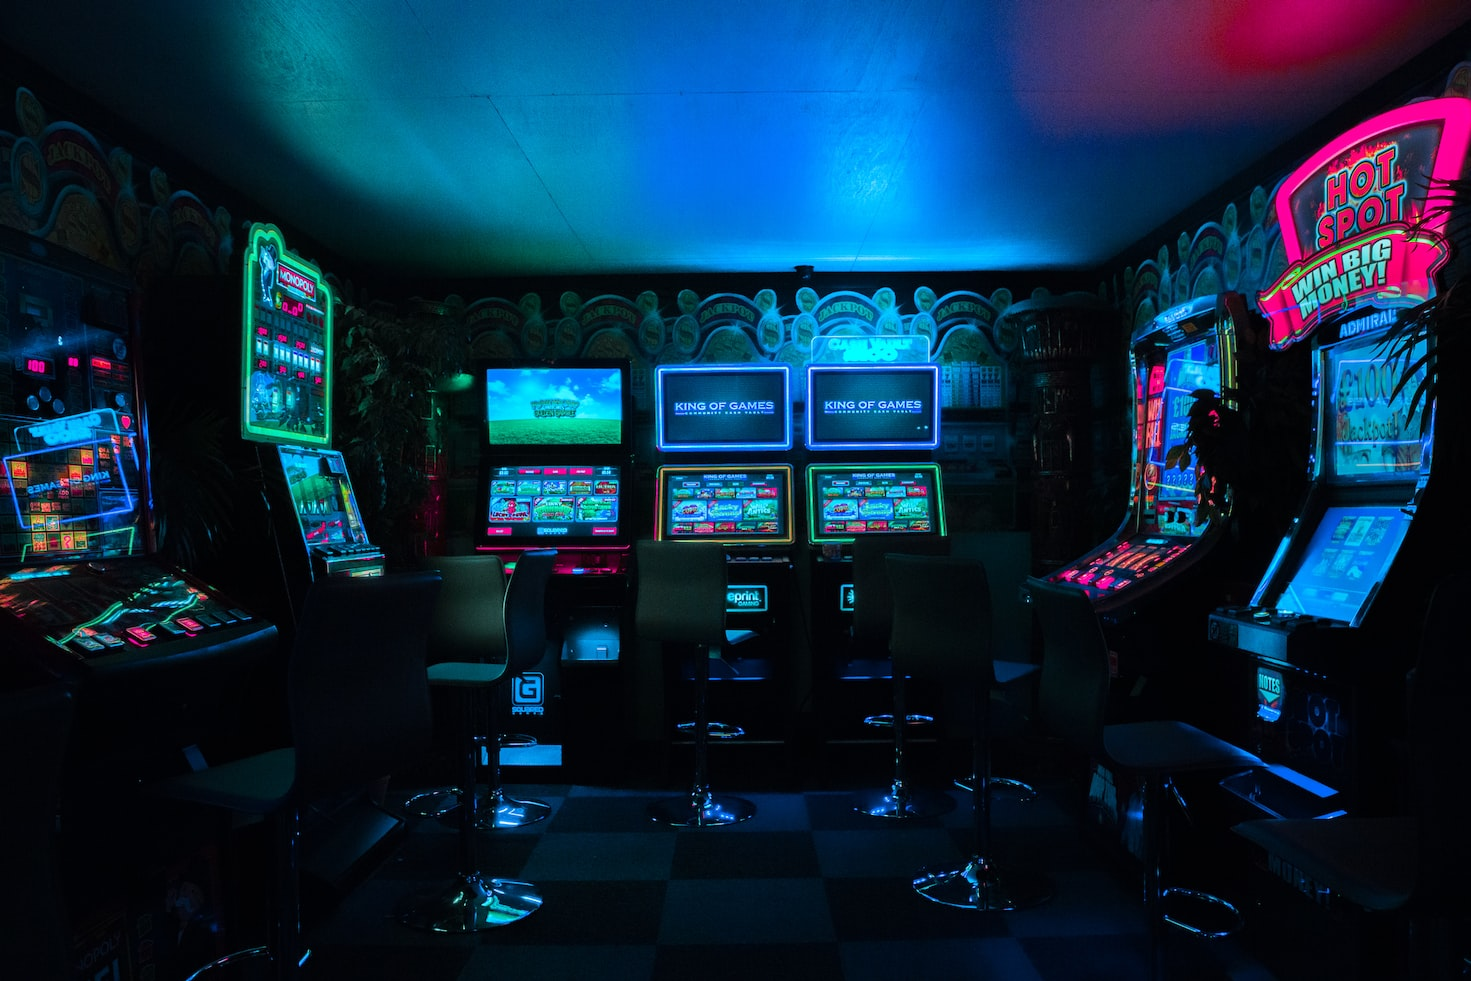

In [9]:
import requests
import io
from PIL import Image

def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://images.unsplash.com/photo-1511512578047-dfb367046420?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")

In [25]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"What's in this image"
        },
        {
            "type":"image_url",
            "image_url": "https://images.unsplash.com/photo-1511512578047-dfb367046420?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
        }
    ]
)

In [26]:
llm.invoke([message])

AIMessage(content=' The image shows a room with slot machines. The room is dark and the only light comes from the slot machines themselves. The machines are brightly lit and have various colors, which creates a somewhat surreal atmosphere. The room is empty, except for the slot machines, and there is no one in the image.')

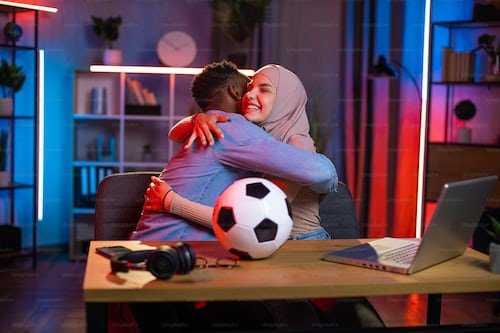

In [36]:
img_url = "https://plus.unsplash.com/premium_photo-1661756822372-1988127ffdca?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MjF8fGZvb3RiYWxsJTIwZ2FtZXN8ZW58MHx8MHx8fDA%3D"
show_image(img_url)

In [38]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"Explain what are happening in this image"
        },
        {
            "type":"image_url",
            "image_url": img_url
        }
    ]
)

In [39]:
result = llm.invoke([message])

In [40]:
to_markdown(result.content)

> A young couple is sitting at a desk in their home. The woman is wearing a hijab and the man is wearing a casual shirt. They are both smiling and hugging each other. There is a laptop, a soccer ball, and a pair of headphones on the table.

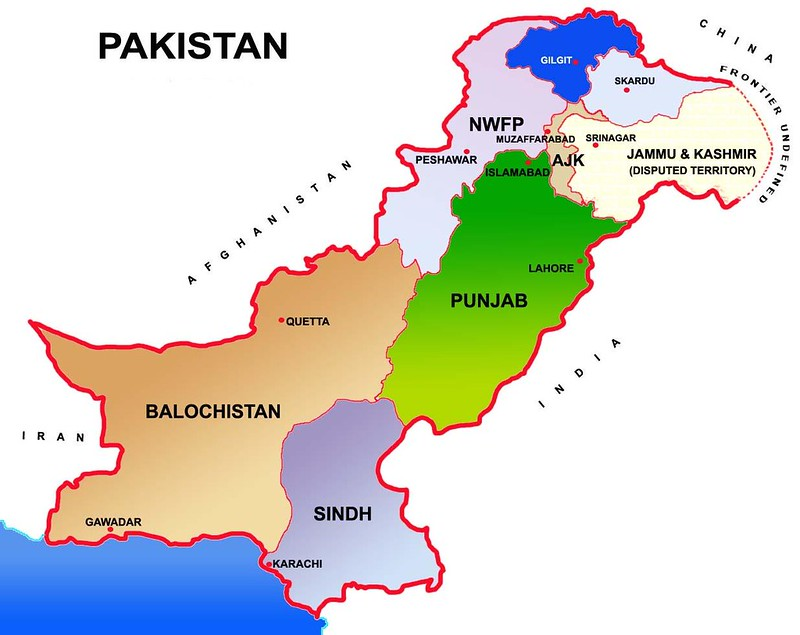

In [10]:
img_url = "https://live.staticflickr.com/2141/2038138608_3390c22b99_c.jpg"
show_image(img_url)

In [11]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"Explain what are happening in this image"
        },
        {
            "type":"image_url",
            "image_url": img_url
        }
    ]
)

In [12]:
result = llm.invoke([message])
to_markdown(result.content)

> The image shows the map of Pakistan. It is a country located in southern Asia. It is bordered by India to the east, Afghanistan to the west and north, Iran to the southwest, and China to the northeast. The country is divided into four provinces: Punjab, Sindh, Balochistan, and Khyber Pakhtunkhwa. The capital city is Islamabad.

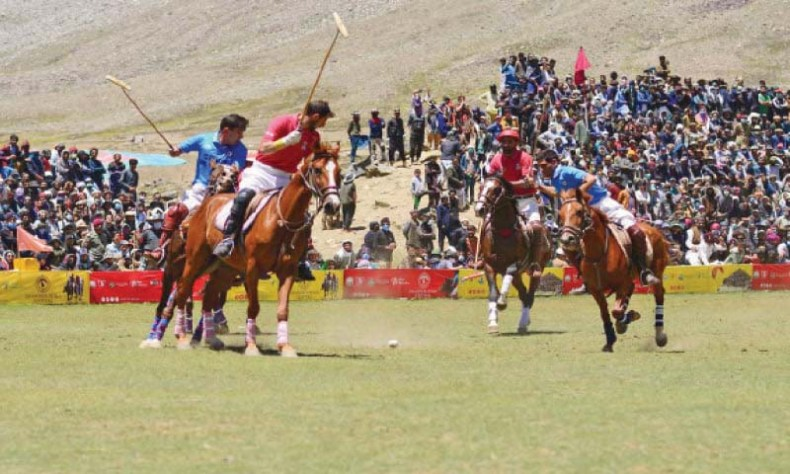

In [18]:
img_url = "https://i0.wp.com/chitraltoday.net/wp-content/uploads/2022/07/polo-2.jpg?fit=790%2C474&ssl=1"
show_image(img_url)

In [20]:
result = llm.invoke([message])
to_markdown(result.content)

>  Shandur Top (Urdu: شندور ٹاپ‎) is a high mountain pass in the Gilgit-Baltistan region of Pakistan, at an elevation of 3,700 metres (12,100 ft). It is located in the Shandur Valley, between the Hindu Kush and Karakoram mountain ranges. The pass connects the Gilgit-Baltistan region with the Chitral District of Khyber Pakhtunkhwa province.
>The Shandur Polo Festival is an annual event that takes place at the Shandur Top. The festival features a traditional polo match between two teams, one from Gilgit-Baltistan and the other from Chitral. The match is played on a field that is located at the top of the pass, and the spectators sit on the surrounding hillsides.
>The Shandur Polo Festival is a major event in the region, and it attracts thousands of visitors from all over Pakistan and abroad. The festival is a celebration of the traditional sport of polo, as well as the unique culture of the Shandur Valley.

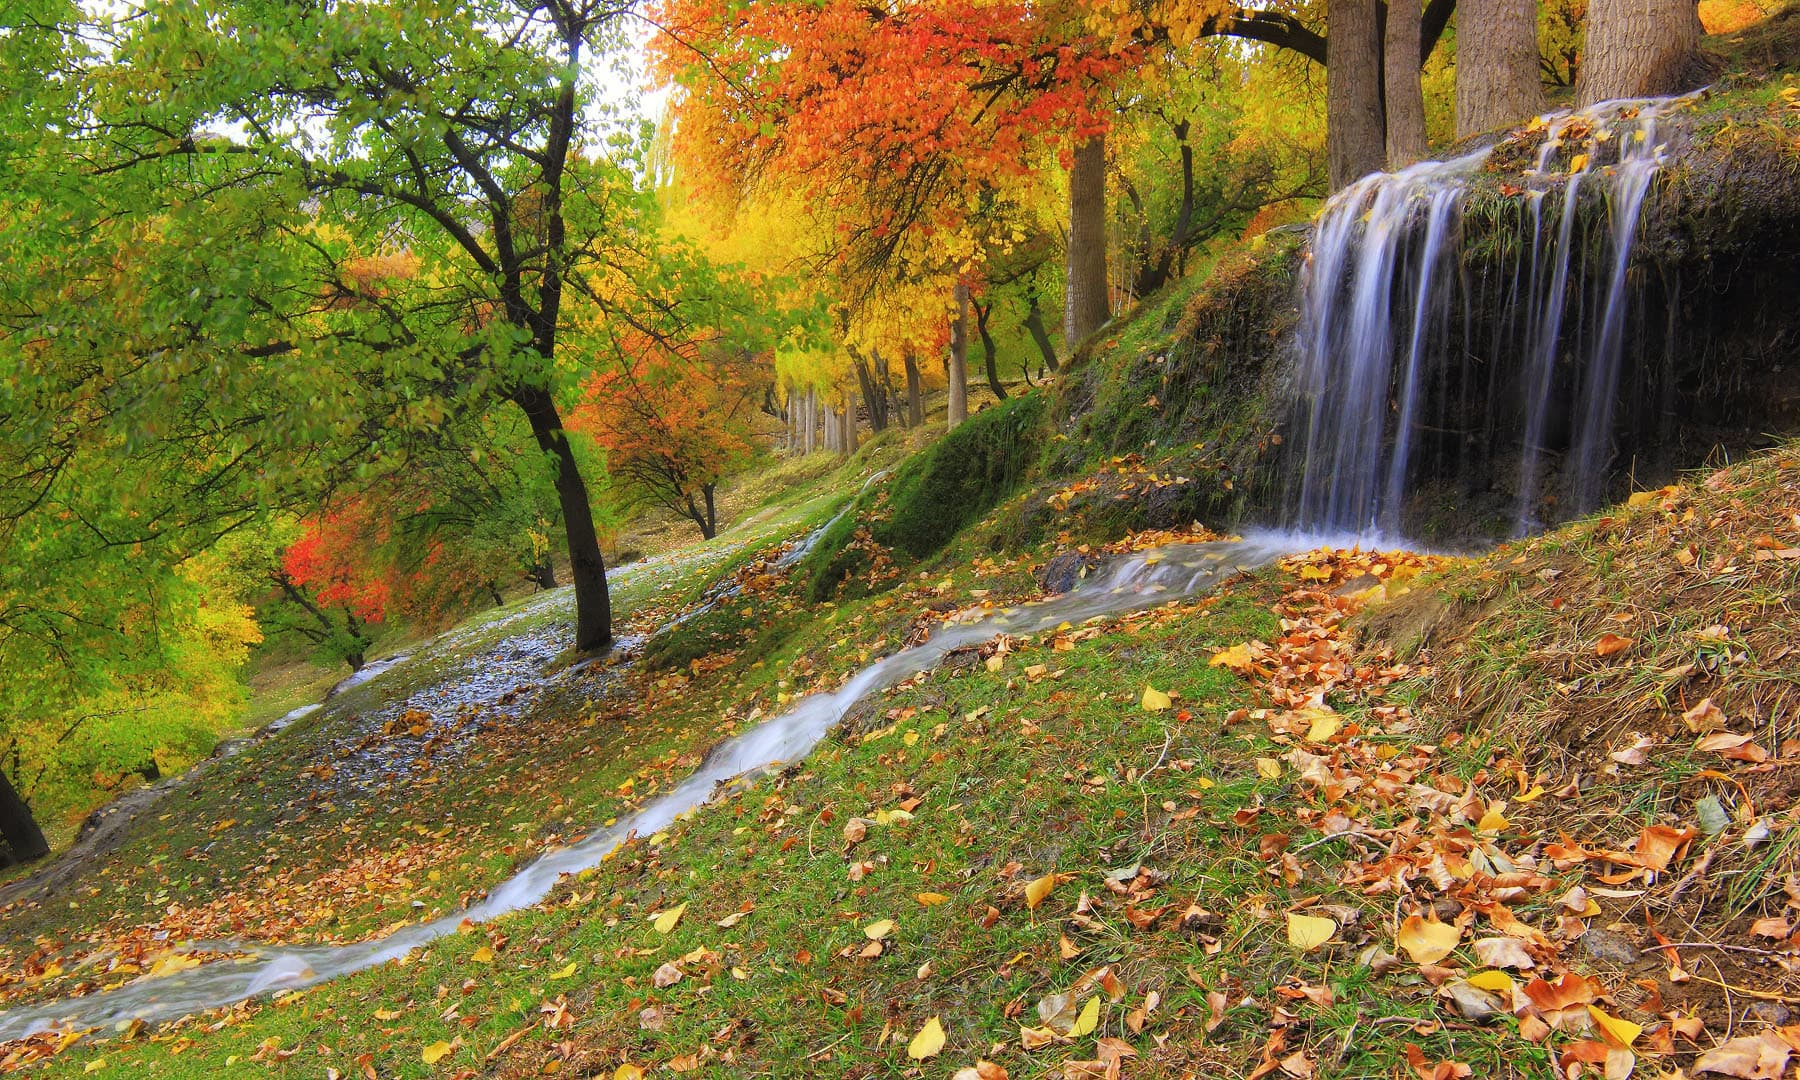

In [22]:
img_url = "https://www.pakistantoursguide.pk/wp-content/uploads/2015/09/Garden-on-the-way-to-Hooper..jpg"
show_image(img_url)

In [23]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"Explain what are happening in this image"
        },
        {
            "type":"image_url",
            "image_url": img_url
        }
    ]
)

In [24]:
result = llm.invoke([message])
to_markdown(result.content)

> In this image, there are a few things that are happening. First, it is autumn, and the leaves on the trees are changing color. This is a beautiful time of year, and the colors of the leaves are a sight to behold. Second, there is a waterfall in the background. The waterfall is small, but it is still a beautiful sight. The water is crystal clear, and it cascades down the rocks into a pool below. The sound of the waterfall is peaceful and relaxing. Finally, there are some trees in the foreground. The trees are tall and majestic, and they provide a nice frame for the picture.

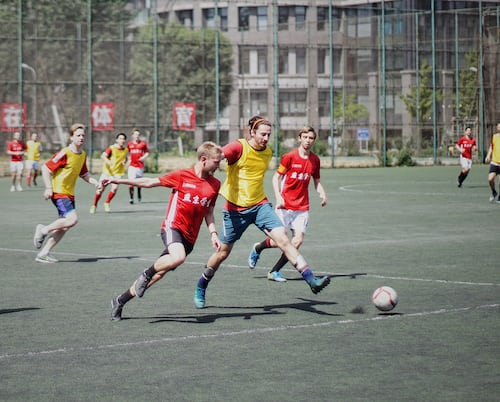

In [27]:
show_image("https://images.unsplash.com/photo-1494778696781-8f23fd5553c4?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTJ8fGZvb3RiYWxsJTIwZ2FtZXN8ZW58MHx8MHx8fDA%3D")

In [28]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import  ChatGoogleGenerativeAI

In [31]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type" : "text",
            "text" : "Write a detailed blog post based on this picture, make sure to cover each and every aspect in the blog post"
        },
        {
            "type":  "image_url",
            "image_url": "https://images.unsplash.com/photo-1494778696781-8f23fd5553c4?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTJ8fGZvb3RiYWxsJTIwZ2FtZXN8ZW58MHx8MHx8fDA%3D"
        }
    ]
)

In [32]:
result = llm.invoke([message])

In [33]:
to_markdown(result.content)

> **The Basics of Soccer**
>
>Soccer is a team sport played with a round ball between two teams of 11 players. The object of the game is to score by getting the ball into the opposing team's goal. The team with the most goals at the end of the game wins.
>
>Soccer is played on a rectangular field with a goal at each end. The field is divided into two halves, and each half is divided into two quarters. The game is played in two 45-minute halves, with a 15-minute break in between.
>
>Each team has 11 players on the field, including a goalkeeper, who is the only player allowed to use their hands to handle the ball. The other 10 players are outfield players, who use their feet, head, and chest to control the ball.
>
>The game is started with a kickoff, where one team kicks the ball from the center of the field. The team that kicks off can then pass the ball to a teammate, or they can try to score a goal.
>
>The ball can be passed between players, or it can be kicked. Players can also use their head or chest to control the ball. The ball cannot be handled by any player other than the goalkeeper.
>
>If a player commits a foul, they may be given a yellow card or a red card. A yellow card is a warning, and a red card means that the player is sent off the field.
>
>The game ends when one team has scored more goals than the other. If the score is tied at the end of regulation time, the game goes into overtime. Overtime consists of two 15-minute periods. If the score is still tied after overtime, the game is decided by a penalty shootout.
>
>**The History of Soccer**
>
>Soccer is one of the oldest sports in the world. The earliest evidence of soccer being played dates back to ancient China in the 2nd and 3rd centuries BC. The game was then adopted by the Greeks and Romans, who called it "soccer".
>
>Soccer spread to Europe in the Middle Ages, and it quickly became a popular sport. The first soccer clubs were formed in England in the 19th century, and the first international soccer match was played between England and Scotland in 1872.
>
>The Fédération Internationale de Football Association (FIFA), the governing body of soccer, was founded in 1904. The first FIFA World Cup was held in Uruguay in 1930, and it has been held every four years since then, except for during World War II.
>
>Soccer is now the most popular sport in the world, with over 250 million players in more than 200 countries. The FIFA World Cup is the most-watched sporting event in the world, with an estimated 1.5 billion viewers.
>
>**The Rules of Soccer**
>
>The rules of soccer are relatively simple. The game is played on a rectangular field with a goal at each end. Each team has 11 players on the field, including a goalkeeper. The object of the game is to score by getting the ball into the opposing team's goal.
>
>The game is started with a kickoff, where one team kicks the ball from the center of the field. The team that kicks off can then pass the ball to a teammate, or they can try to score a goal.
>
>The ball can be passed between players, or it can be kicked. Players can also use their head or chest to control the ball. The ball cannot be handled by any player other than the goalkeeper.
>
>If a player commits a foul, they may be given a yellow card or a red card. A yellow card is a warning, and a red card means that the player is sent off the field.
>
>The game ends when one team has scored more goals than the other. If the score is tied at the end of regulation time, the game goes into overtime. Overtime consists of two 15-minute periods. If the score is still tied after overtime, the game is decided by a penalty shootout.
>
>**The Different Positions in Soccer**
>
>There are 11 different positions in soccer. The goalkeeper is the only player who is allowed to use their hands to handle the ball. The defenders are responsible for preventing the opposing team from scoring goals. The midfielders are responsible for moving the ball from the defense to the attack. The forwards are responsible for scoring goals.
>
>The goalkeeper is the last line of defense for the team. They are responsible for preventing the opposing team from scoring goals. Goalkeepers must be agile and have good reflexes. They must also be able to communicate well with their defenders.
>
>The defenders are responsible for preventing the opposing team from scoring goals. They must be strong and physical. They must also be able to read the game well and anticipate the opposing team's attacks.
>
>The midfielders are responsible for moving the ball from the defense to the attack. They must